# Mesh Basics

In [1]:
from __future__ import print_function
import numpy as np
import mesh.patch as patch
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Setup a Grid with Variables

There are a few core classes that we deal with when creating a grid with associated variables:

* `Grid2d` : this holds the size of the grid (in zones) and the physical coordinate information, including coordinates of cell edges and centers

* `BCObject` : this is a container class that simply holds the type of boundary condition on each domain edge.

* `ArrayIndexer` : this is an array of data along with methods that know how to access it with different offsets into the data that usually arise in stencils (like {i+1, j})

* `CellCenterData2d` : this holds the data that lives on a grid.  Each variable that is part of this class has its own boundary condition type.

We start by creating a `Grid2d` object with 8x8 cells and 2 ghost cells

In [24]:
g = patch.Grid2d(4, 6, ng=2)
print(g)

2-d grid: nx = 4, ny = 6, ng = 2


Then create a dataset that lives on this grid and add a variable name.  For each variable that lives on the grid, we need to define the boundary conditions -- this is done through the BCObject.

In [25]:
bc = patch.BCObject(xlb="periodic", xrb="periodic", ylb="reflect", yrb="outflow")
print(bc)

BCs: -x: periodic  +x: periodic  -y: reflect-even  +y: outflow


In [26]:
d = patch.CellCenterData2d(g)
d.register_var("a", bc)
d.create()
print(d)

cc data: nx = 4, ny = 6, ng = 2
   nvars = 1
   variables: 
               a: min:    0.0000000000    max:    0.0000000000
                  BCs: -x: periodic     +x: periodic     -y: reflect-even +y: outflow     



## Working with the data

In [27]:
a = d.get_var("a")
a.v()[:,:] = np.random.rand(g.nx, g.ny)

In [28]:
a.pretty_print()

         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0   0.10165   0.91753   0.42677  0.042116         0         0 
         0         0   0.53059   0.85824   0.97957   0.67492         0         0 
         0         0   0.57227   0.20404   0.67591   0.67115         0         0 
         0         0 0.0073467   0.53802   0.18361   0.13322         0         0 
         0         0   0.39245    0.5437   0.85824    0.4345         0         0 
         0         0    0.1698   0.47776   0.06931   0.77009         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 

         ^ y
         |
         +---> x
        


`pretty_print()` can also take an argumet, specifying the format string to be used for the output.

In [29]:
a.pretty_print(fmt="%7.3g")

      0      0      0      0      0      0      0      0 
      0      0      0      0      0      0      0      0 
      0      0  0.102  0.918  0.427 0.0421      0      0 
      0      0  0.531  0.858   0.98  0.675      0      0 
      0      0  0.572  0.204  0.676  0.671      0      0 
      0      00.00735  0.538  0.184  0.133      0      0 
      0      0  0.392  0.544  0.858  0.435      0      0 
      0      0   0.17  0.478 0.0693   0.77      0      0 
      0      0      0      0      0      0      0      0 
      0      0      0      0      0      0      0      0 

         ^ y
         |
         +---> x
        


In [30]:
d.fill_BC("a")
a.pretty_print()

   0.42677  0.042116   0.10165   0.91753   0.42677  0.042116   0.10165   0.91753 
   0.42677  0.042116   0.10165   0.91753   0.42677  0.042116   0.10165   0.91753 
   0.42677  0.042116   0.10165   0.91753   0.42677  0.042116   0.10165   0.91753 
   0.97957   0.67492   0.53059   0.85824   0.97957   0.67492   0.53059   0.85824 
   0.67591   0.67115   0.57227   0.20404   0.67591   0.67115   0.57227   0.20404 
   0.18361   0.13322 0.0073467   0.53802   0.18361   0.13322 0.0073467   0.53802 
   0.85824    0.4345   0.39245    0.5437   0.85824    0.4345   0.39245    0.5437 
   0.06931   0.77009    0.1698   0.47776   0.06931   0.77009    0.1698   0.47776 
   0.06931   0.77009    0.1698   0.47776   0.06931   0.77009    0.1698   0.47776 
   0.85824    0.4345   0.39245    0.5437   0.85824    0.4345   0.39245    0.5437 

         ^ y
         |
         +---> x
        


In [31]:
a.norm()

0.55213949003256269

In [32]:
print(a.min(), a.max())

0.00734670082401 0.979570681667


## `ArrayIndexer`

We we access the data, an `ArrayIndexer` object is returned.  We can use the `ip()`, `jp()`, or `ipjp()` methods to the ArrayIndexer object shift our view in the x, y, or x & y directions.

To make this clearer, we'll change our data set to be nicely ordered numbers.  The `.d` property is simply a raw view into the underlying `ndarray`, all valid cells and ghostcells.  The `.v()` method gives a view into just the valid data

In [33]:
type(a)

mesh.patch.ArrayIndexer

In [34]:
type(a.d)

numpy.ndarray

In [35]:
type(a.v())

numpy.ndarray

In [36]:
a.d[:,:] = np.arange(g.qx*g.qy).reshape(g.qx, g.qy)

In [37]:
a.pretty_print()

         9        19        29        39        49        59        69        79 
         8        18        28        38        48        58        68        78 
         7        17        27        37        47        57        67        77 
         6        16        26        36        46        56        66        76 
         5        15        25        35        45        55        65        75 
         4        14        24        34        44        54        64        74 
         3        13        23        33        43        53        63        73 
         2        12        22        32        42        52        62        72 
         1        11        21        31        41        51        61        71 
         0        10        20        30        40        50        60        70 

         ^ y
         |
         +---> x
        


We index our arrays as {i,j}, so x (indexed by i) is the row and y (indexed by j) is the column in the NumPy array.   Note that python arrays are stored in row-major order, which means that all of the entries in the same row are adjacent in memory.  This means that when we simply print out the `ndarray`, we see constant-x horizontally, which is the transpose of what we are used to.

In [38]:
a.v()

array([[ 22.,  23.,  24.,  25.,  26.,  27.],
       [ 32.,  33.,  34.,  35.,  36.,  37.],
       [ 42.,  43.,  44.,  45.,  46.,  47.],
       [ 52.,  53.,  54.,  55.,  56.,  57.]])

We can offset our view into the array by one in x -- this would be like {i+1, j} when we loop over data.  The `ip()` method is used here, and takes an argument which is the (positive) shift in the x (i) direction.  So here's a shift by 1

In [41]:
a.ip(1)

array([[ 32.,  33.,  34.,  35.,  36.,  37.],
       [ 42.,  43.,  44.,  45.,  46.,  47.],
       [ 52.,  53.,  54.,  55.,  56.,  57.],
       [ 62.,  63.,  64.,  65.,  66.,  67.]])

A shifted view is necessarily smaller than the original array, and relies on ghost cells to bring new data into view.  Because of this, the underlying data is no longer the same size as the original data, so we return it as an `ndarray` (which is actually just a view into the data in the `ArrayIndexer` object, so no copy is made.

To see that it is simply a view, lets so the shift an edit the data

In [42]:
d = a.ip(1)
d[1,1] = 0.0
a.pretty_print()

         9        19        29        39        49        59        69        79 
         8        18        28        38        48        58        68        78 
         7        17        27        37        47        57        67        77 
         6        16        26        36        46        56        66        76 
         5        15        25        35        45        55        65        75 
         4        14        24        34        44        54        64        74 
         3        13        23        33         0        53        63        73 
         2        12        22        32        42        52        62        72 
         1        11        21        31        41        51        61        71 
         0        10        20        30        40        50        60        70 

         ^ y
         |
         +---> x
        


Here, since d was really a view into $a_{i+1,j}$, and we accessed element (1,1) into that view (with 0,0 as the origin), we were really accessing the element (2,1) in the valid region

## Differencing

`ArrayIndexer` objects are easy to use to construct differences, like those that appear in a stencil for a finite-difference, without having to explicitly loop over the elements of the array.

Here's we'll create a new dataset that is initialized with a sine function

In [44]:
g = patch.Grid2d(8, 8, ng=2)
d = patch.CellCenterData2d(g)
bc = patch.BCObject(xlb="periodic", xrb="periodic", ylb="periodic", yrb="periodic")
d.register_var("a", bc)
d.create()

a = d.get_var("a")
a.d[:,:] = np.sin(2.0*np.pi*a.g.x2d)
d.fill_BC("a")

Our grid object can provide us with a scratch array (an `ArrayIndexer` object) define on the same grid

In [45]:
b = g.scratch_array()
type(b)

mesh.patch.ArrayIndexer

We can then fill the data in this array with differenced data from our original array -- since `b` has a separate data region in memory, its elements are independent of `a`.  We do need to make sure that we have the same number of elements on the left and right of the `=`.  Since by default, `ip()` will return a view with the same size as the valid region, we can use `.v()` on the left to accept the differences.

Here we compute a centered-difference approximation to the first derivative

In [47]:
b.v()[:,:] = (a.ip(1) - a.ip(-1))/(2.0*a.g.dx)
# normalization was 2.0*pi
b.d[:,:] /= 2.0*np.pi

0.125


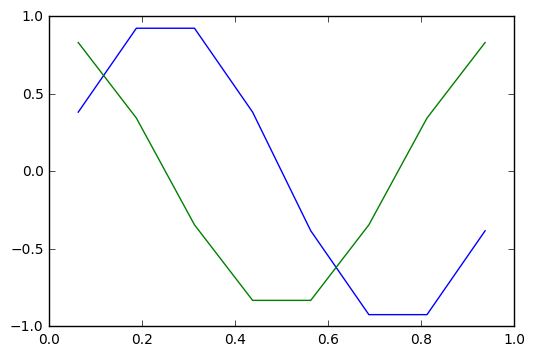

In [48]:
plot(g.x[g.ilo:g.ihi+1], a.d[g.ilo:g.ihi+1,a.g.jc])
plot(g.x[g.ilo:g.ihi+1], b.d[g.ilo:g.ihi+1,b.g.jc])
print (a.g.dx)

## coarsening and prolonging

In [49]:
c = d.restrict("a")

In [50]:
c.pretty_print()

         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0   0.65328   0.65328  -0.65328  -0.65328         0         0 
         0         0   0.65328   0.65328  -0.65328  -0.65328         0         0 
         0         0   0.65328   0.65328  -0.65328  -0.65328         0         0 
         0         0   0.65328   0.65328  -0.65328  -0.65328         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 

         ^ y
         |
         +---> x
        


In [51]:
f = d.prolong("a")

In [52]:
f.pretty_print()

         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0 
         0         0   0.21936     0.546   0.85623   0.99153   0.99153   0.85623     0.546   0.21936  -0.21936    -0.546  -0.85623  -0.99153  -0.99153  -0.85623    -0.546  -0.21936         0         0 
         0         0   0.21936     0.546   0.85623   0.99153   0.99153   0.85623     0.546   0.21936  -0.21936    -0.546  -0.85623  -0.99153  -0.99153  -0.85623    -0.546  -0.21936         0         0 
         0         0   0.21936     0.546   0.85623   0.99153   0.99153   0.85623     0.546   0.21936  -0.21936    -0.546  -0.85623  -0.99153  -0.99153  -0.85623    -0.546  -0.21936         0  